#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: 

- Member 1:
- Member 2:
- Member 3:
- Member 4:


#### Import libraries

In [1]:
%config Completer.use_jedi=False # comment if not needed

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import necessary libraries for Feature Selection and Sampling
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE # for oversampling
from collections import Counter # for counting

Note: you may need to restart the kernel to use updated packages.


#### Load the dataset

In [2]:
df = pd.read_csv('D:/Documents/Cervical Cancer/risk_factors.csv', na_values='?') # Load the dataset
df.sample(10) # Display a random sample of 5 rows from the dataset


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
538,24,3.0,18.0,2.0,0.0,0.000000,0.000000,1.0,0.16,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
102,31,3.0,18.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
712,23,3.0,17.0,1.0,1.0,1.266973,0.513202,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
582,20,4.0,15.0,2.0,0.0,0.000000,0.000000,1.0,5.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
630,26,2.0,18.0,4.0,0.0,0.000000,0.000000,1.0,3.50,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
751,41,1.0,17.0,3.0,0.0,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
191,29,3.0,14.0,2.0,0.0,0.000000,0.000000,1.0,2.00,1.0,...,NaN,NaN,0,0,0,0,1,1,0,0
114,34,3.0,15.0,4.0,0.0,0.000000,0.000000,1.0,0.66,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
277,20,1.0,19.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
14,43,2.0,18.0,5.0,0.0,0.000000,0.000000,0.0,0.00,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
# Summarize the dataset
df.info() # Display information about the dataset
# df.describe() # Display descriptive statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [4]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) # Display the count of missing values in each column

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:pelvic inflammatory disease      105
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
STDs:HIV                              105
STDs:AIDS                             105
STDs:molluscum contagiosum            105
STDs:genital herpes                   105
STDs:syphilis                         105
STDs:vaginal condylomatosis           105
STDs:cervical condylomatosis          105
STDs:condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

### Checking for Mismatches

* **Ensure semantic consistency:** By verifying that whenever a Boolean flag is “Yes” the corresponding count or duration isn’t missing, and whenever it’s “No” the count/duration isn’t positive, we confirm that the two columns truly pair up as presence ↔ quantity.

* **Validate main‐flag integrity:** Checking that no specific-STD flag is raised when the overall STDs flag is 0 guarantees there are no hidden contradictions in the data.

* **Prevent misleading imputations:** If any of these mismatches existed, blindly filling NaNs with zero could produce implausible “no history” signals for patients who actually did have a condition (or vice versa).



In [5]:
# Pairs of (flag, count)
pairs = [
    ("Smokes", "Smokes (years)"),
    ("Smokes", "Smokes (packs/year)"),
    ("Hormonal Contraceptives", "Hormonal Contraceptives (years)"),
    ("IUD", "IUD (years)")
]


std_specific_flags = [
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes",
    "STDs:molluscum contagiosum",
    "STDs:AIDS",
    "STDs:HIV",
    "STDs:Hepatitis B",
    "STDs:HPV"
]

def check_flag_count(flag, count_col):
    # 1) Flag = 1 but count is missing
    mask1 = (df[flag] == 1) & (df[count_col].isna())
    print(f"\nRows where {flag}=1 but {count_col} is NaN:\n", df[mask1])

    # 2) Flag = 0 but count > 0
    mask2 = (df[flag] == 0) & (df[count_col].fillna(0) > 0)
    print(f"\nRows where {flag}=0 but {count_col} > 0:\n", df[mask2])


# Any specific‐STD flag = 1 ⇒ STDs main flag = 1?
for col in std_specific_flags:
    mask = (df[col] == 1) & (df["STDs"] == 0)
    print(col, "mismatch count:", mask.sum())

for flag, count in pairs:
    check_flag_count(flag, count)

STDs:condylomatosis mismatch count: 0
STDs:cervical condylomatosis mismatch count: 0
STDs:vaginal condylomatosis mismatch count: 0
STDs:vulvo-perineal condylomatosis mismatch count: 0
STDs:syphilis mismatch count: 0
STDs:pelvic inflammatory disease mismatch count: 0
STDs:genital herpes mismatch count: 0
STDs:molluscum contagiosum mismatch count: 0
STDs:AIDS mismatch count: 0
STDs:HIV mismatch count: 0
STDs:Hepatitis B mismatch count: 0
STDs:HPV mismatch count: 0

Rows where Smokes=1 but Smokes (years) is NaN:
 Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STD

After running these sanity checks and observing zero mismatches in every case, we can be confident that missing values in those Boolean flags and their count/duration partners legitimately represent “none” or “zero.” At that point, zero-imputation (filling NaNs with 0) both preserves the true absence signal and readies the dataset for downstream modeling without introducing any semantic errors.

1. Dropping the two “time since diagnosis” columns (≈92% missing)

2. Imputing 0 for all Boolean flags.

3. Imputing median for the remaining truly numeric columns with moderate missingness


In [6]:
# 1. Drop the two “time since diagnosis” columns with ~92% missing
df = df.drop(columns=[
    "STDs: Time since first diagnosis",
    "STDs: Time since last diagnosis"
])

# 2. Zero-fill Boolean flags and their count/duration partners
bool_and_count_cols = [
    "Smokes", "Smokes (years)", "Smokes (packs/year)",
    "Hormonal Contraceptives", "Hormonal Contraceptives (years)",
    "IUD", "IUD (years)",
    "STDs", "STDs (number)",
    "STDs:condylomatosis", "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis", "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis", "STDs:pelvic inflammatory disease",
    "STDs:genital herpes", "STDs:molluscum contagiosum",
    "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV"
]

imp_zero = SimpleImputer(strategy="constant", fill_value=0)
df[bool_and_count_cols] = imp_zero.fit_transform(df[bool_and_count_cols])

# 3. Median-impute the remaining numeric columns
numeric_cols = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies"
]

imp_median = SimpleImputer(strategy="median")
df[numeric_cols] = imp_median.fit_transform(df[numeric_cols])

# Verify that no NaNs remain
print("Total missing values after imputation:", df.isna().sum().sum())


Total missing values after imputation: 0


In [7]:
# Set target variable
label = "Biopsy"
df[label].value_counts() # Display the count of each class in the target variable

Biopsy
0    803
1     55
Name: count, dtype: int64

Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64


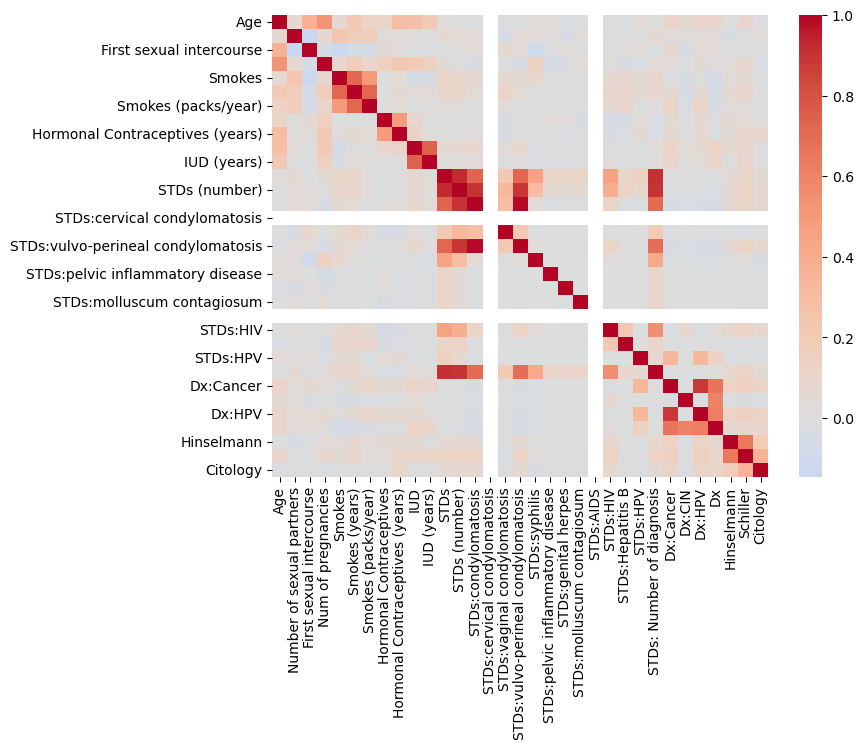

In [8]:
# 1. Target balance
print(df["Biopsy"].value_counts(normalize=True))

# 2. Simple correlations
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop("Biopsy", axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()


In [9]:
# Count exact duplicates (all columns identical)
dup_count = df.duplicated().sum()
print(f"Exact duplicate rows: {dup_count}")

Exact duplicate rows: 38


In [10]:
df.drop_duplicates(keep="first", inplace=True)
df


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
df.reset_index(drop=True, inplace=True) # Reset the index after dropping duplicates
df.tail() # Display the last 5 rows of the DataFrame

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
815,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
816,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
817,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
818,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0
819,29.0,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape # Display the shape of the DataFrame

(820, 34)

#### Split the dataset
Split the dataset into training, validation and test sets.

In [13]:
# Split the dataset into training, validation, and test sets
# Training : Validation : Test = 7 : 1 : 2

# 1. Features & target
X = df.drop("Biopsy", axis=1)
y = df["Biopsy"].astype(int)

# 2. Split the dataset into training and test sets
#    test_size = 0.2 as (training dataset + validation dataset) : test dataset = 8 : 2
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.20,      # 20% of the original data
    stratify=y,
    random_state=42
)

# 3. Of the remaining 80%, take 10% of the ORIGINAL as VALIDATION.
#    test_size = 0.125 as training dataset : validation dataset = 7 : 1
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.125,     # 0.125 * 80% = 10% of original
    stratify=y_temp,
    random_state=42
)

# 4. Verify the splits
print("Train  (≈70%):", X_train.shape, y_train.value_counts(normalize=True).to_dict())
print("Valid  (≈10%):", X_val.shape,   y_val.value_counts(normalize=True).to_dict())
print("Test   (≈20%):", X_test.shape,  y_test.value_counts(normalize=True).to_dict())

Train  (≈70%): (574, 33) {0: 0.9337979094076655, 1: 0.06620209059233449}
Valid  (≈10%): (82, 33) {0: 0.9390243902439024, 1: 0.06097560975609756}
Test   (≈20%): (164, 33) {0: 0.9329268292682927, 1: 0.06707317073170732}


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

In [14]:
# Find columns with only one unique value (zero variance)
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant columns to drop:", constant_cols)

# Drop them
X_train.drop(columns=constant_cols, inplace=True)
X_val  .drop(columns=constant_cols, inplace=True)
X_test .drop(columns=constant_cols, inplace=True)

# Save correct feature names before scaling and SMOTE
final_feature_names = X_train.columns

Constant columns to drop: ['STDs:cervical condylomatosis', 'STDs:AIDS']


In [15]:
# 1. Instantiate the scaler
scaler = StandardScaler()

# 2. Fit the scaler on the training data
scaler.fit(X_train)

# 3. Transform train, val, and test features
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# 4. (Optional) Print to confirm
import numpy as np
print("Scaled X_train mean (first 5 cols):", np.mean(X_train_scaled, axis=0)[:5])
print("Scaled X_train std  (first 5 cols):", np.std(X_train_scaled, axis=0)[:5])

Scaled X_train mean (first 5 cols): [-1.82587201e-16  3.09469833e-17 -1.36166726e-16 -3.55890308e-17
 -5.57045699e-17]
Scaled X_train std  (first 5 cols): [1. 1. 1. 1. 1.]


In [16]:
print(df["Biopsy"].value_counts())
print(df["Biopsy"].value_counts(normalize=True))

Biopsy
0    766
1     54
Name: count, dtype: int64
Biopsy
0    0.934146
1    0.065854
Name: proportion, dtype: float64


#### Oversampling

SMOTE xxx

In [17]:
# Apply SMOTE to scaled training features only
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print class distributions for confirmation
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 536, 1: 38})
After SMOTE: Counter({0: 536, 1: 536})


#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

In [18]:
# Fit SelectKBest on balanced, scaled training data (after SMOTE)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_kbest = selector.fit_transform(X_train_resampled, y_train_resampled)

# Transform validation and test sets (which are scaled but NOT resampled)
X_val_kbest  = selector.transform(X_val_scaled)
X_test_kbest = selector.transform(X_test_scaled)

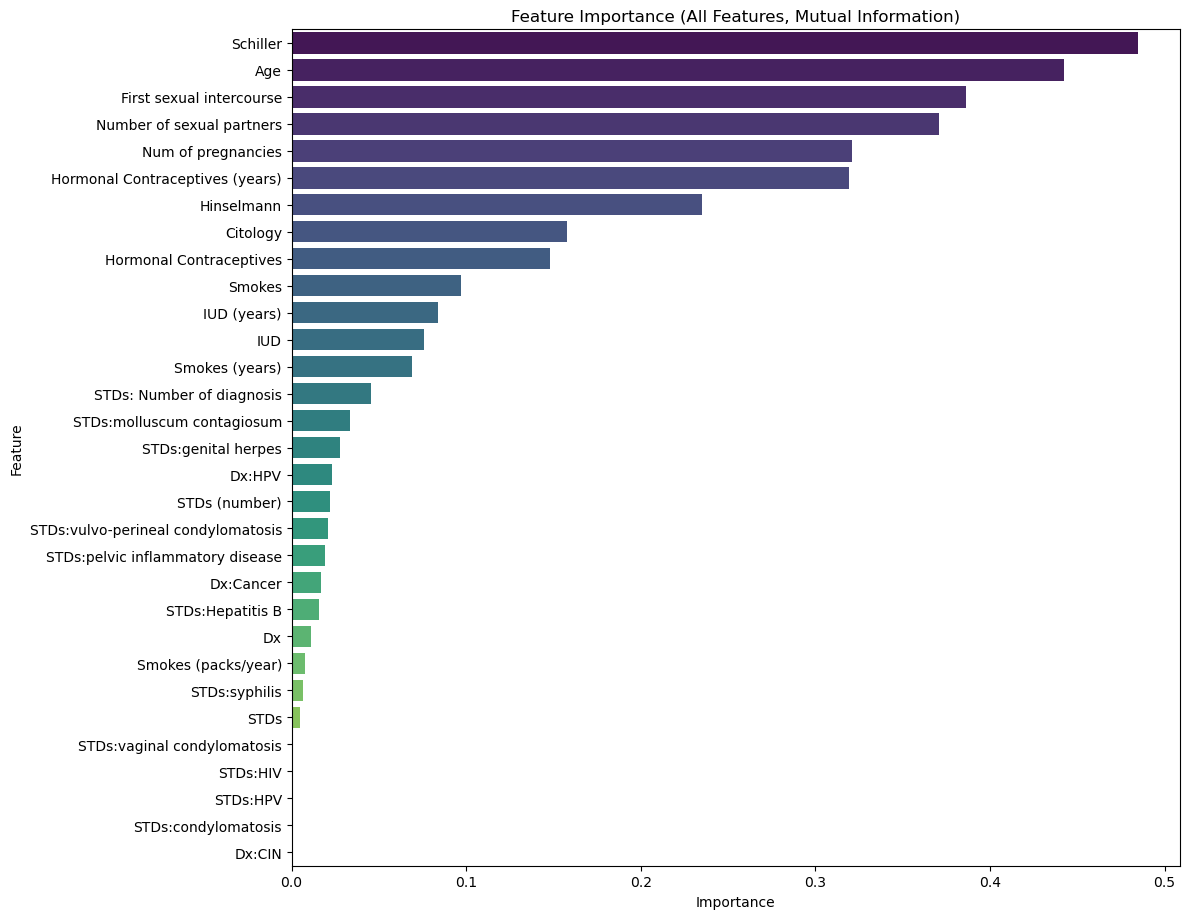

In [19]:
# Visualize the target variable distribution

# Get all feature names and their scores
all_feature_names = final_feature_names
all_scores = selector.scores_

feature_importances = pd.DataFrame({
    "feature": all_feature_names,
    "importance": all_scores
}).sort_values("importance", ascending=False)

plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))
sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (All Features, Mutual Information)")
plt.tight_layout()
plt.show()


Selected features (Mutual Information): ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'Hinselmann', 'Schiller', 'Citology']


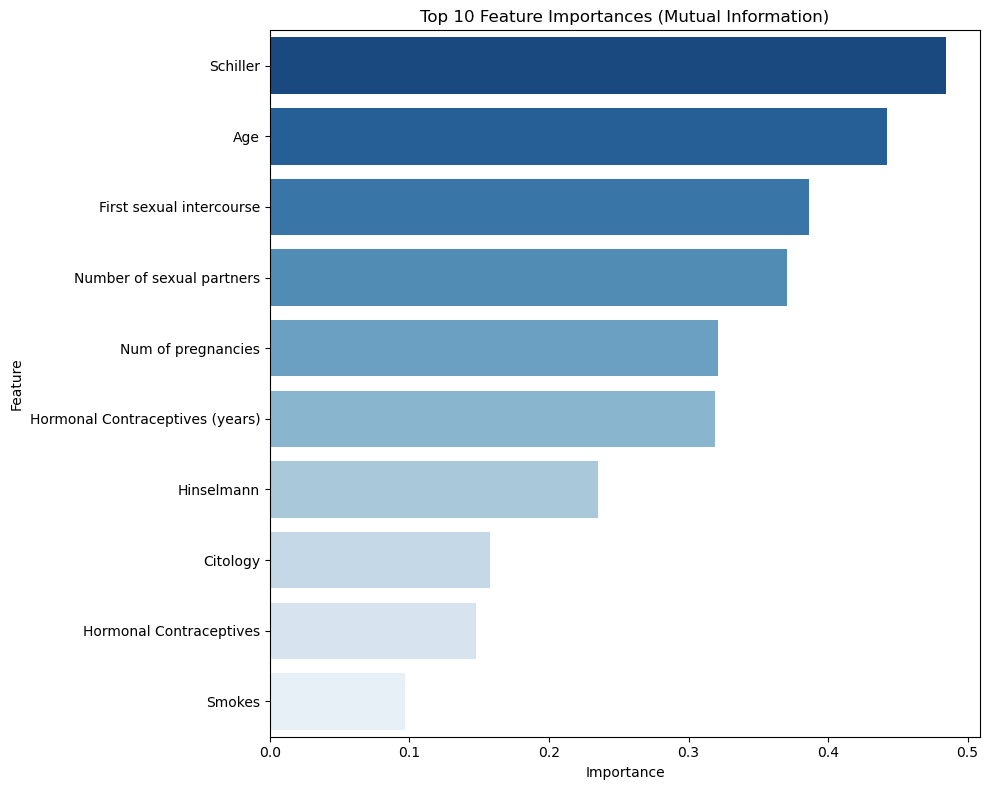

In [20]:

# Get the names of the selected features
selected_features = np.array(final_feature_names)[selector.get_support()]
print("Selected features (Mutual Information):", selected_features.tolist())

# Assuming feature_importances is already sorted descending by 'importance'
top_n = 10
top_features = feature_importances.head(top_n)

plt.figure(figsize=(10, 0.6 * top_n + 2))  # Dynamically adjust height
sns.barplot(x="importance", y="feature", data=top_features, palette="Blues_r")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importances (Mutual Information)")
plt.tight_layout()
plt.show()

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

Function

In [21]:
# Repeated Stratified K-Fold Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

In [22]:
def plot_confusion_matrices_side_by_side(y_true, y_pred_default, y_pred_optimized, model_name):
    """
    Plot confusion matrices for two models side by side
    """
    cm_default = confusion_matrix(y_true, y_pred_default)
    cm_optimized = confusion_matrix(y_true, y_pred_optimized)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Default model
    sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - Default {model_name}')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    # Optimized model
    sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - Optimized {model_name}')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [23]:
def plot_model_comparison(y_true, y_pred_default, y_pred_optimized, model_name="Model"):
    """
    Plot a bar chart comparing performance metrics between default and optimized models.

    Parameters:
        y_true           : True labels
        y_pred_default   : Predictions from the default model
        y_pred_optimized : Predictions from the optimized model
        model_name       : Full name for the titlE
    """
    # Metrics to compare
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Scores for default model
    default_scores = [
        accuracy_score(y_true, y_pred_default),
        precision_score(y_true, y_pred_default),
        recall_score(y_true, y_pred_default),
        f1_score(y_true, y_pred_default)
    ]

    # Scores for optimized model
    optimized_scores = [
        accuracy_score(y_true, y_pred_optimized),
        precision_score(y_true, y_pred_optimized),
        recall_score(y_true, y_pred_optimized),
        f1_score(y_true, y_pred_optimized)
    ]

    # Bar plot
    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, default_scores, width, label='Default ', color='navy')
    bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized ', color='mediumpurple')

    # Labels and title
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Comparison of Default vs Optimized {model_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Annotate values on bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [24]:
def evaluate_model_on_validation(y_true, y_pred):
    """
    Display evaluation metrics for predictions on the validation set.

    Parameters:
        y_true (array-like): True labels
        y_pred (array-like): Predicted labels
        model_name (str): Name of the model being evaluated
    """
    print(f"\nPerformance Summary")
    print("────────────────────────────────────────────")
    print(f"Accuracy        : {accuracy_score(y_true, y_pred):.6f}")
    print(f"Precision       : {precision_score(y_true, y_pred):.6f}")
    print(f"Recall          : {recall_score(y_true, y_pred):.6f}")
    print(f"F1 Score        : {f1_score(y_true, y_pred):.6f}")

    print("\nConfusion Matrix")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Breakdown")
    print(classification_report(y_true, y_pred))

In [25]:
def plot_roc_curve(model, X_val, y_val, model_name="Model"):
    """
    Plot ROC curve for a binary classifier using validation data.
    
    Parameters:
        model: trained classifier with .predict_proba()
        X_val: validation feature set
        y_val: true labels
        model_name: label to use in plot title
    """
    # Get predicted probabilities for the positive class (class 1)
    y_scores = model.predict_proba(X_val)[:, 1]

    # Compute FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random baseline")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve — {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

### **Logistic Regression (LR)**

An instance of LR with default parameters

In [26]:
# Initialize the Logistic Regression model
lr_default = LogisticRegression(solver="liblinear", random_state=42)

# Fit the model on the training data
lr_default.fit(X_train_kbest, y_train_resampled)

# Make predictions on the validation set
y_val_pred_lr = lr_default.predict(X_val_kbest)

# Evaluate the model on the validation set
print("\nLogistic Regression (Default Parameters)")
evaluate_model_on_validation(y_val, y_val_pred_lr)


Logistic Regression (Default Parameters)

Performance Summary
────────────────────────────────────────────
Accuracy        : 0.951220
Precision       : 0.571429
Recall          : 0.800000
F1 Score        : 0.666667

Confusion Matrix
[[74  3]
 [ 1  4]]

Classification Breakdown
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        77
           1       0.57      0.80      0.67         5

    accuracy                           0.95        82
   macro avg       0.78      0.88      0.82        82
weighted avg       0.96      0.95      0.95        82



Hyperparameter Tuning using **GridSearch CV** for LR

In [27]:
# Define parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization strength (lower = stronger)
    'penalty': ['l1', 'l2'],               # Type of regularization
    'solver': ['saga']                     # Only solver that supports both l1 and l2
}

# Set up GridSearchCV
grid_search_lr = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=lr_param_grid,
    scoring='f1',     # Focus on improving F1 score for imbalanced data
    cv=cv,
    n_jobs=-1
)

# Fit the model on the training data
grid_search_lr.fit(X_train_kbest, y_train_resampled)

# Output the best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Predict on validation set using the best model
y_val_pred_lr_optimized = grid_search_lr.best_estimator_.predict(X_val_kbest)
evaluate_model_on_validation(y_val, y_val_pred_lr_optimized)

Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}

Performance Summary
────────────────────────────────────────────
Accuracy        : 0.963415
Precision       : 0.666667
Recall          : 0.800000
F1 Score        : 0.727273

Confusion Matrix
[[75  2]
 [ 1  4]]

Classification Breakdown
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        77
           1       0.67      0.80      0.73         5

    accuracy                           0.96        82
   macro avg       0.83      0.89      0.85        82
weighted avg       0.97      0.96      0.96        82



In [28]:
results_lr_df = pd.DataFrame(grid_search_lr.cv_results_)
results_lr_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)


,params,mean_test_score,rank_test_score
10,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.940201,1
11,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.940201,1
9,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.940004,3
8,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.939900,4
7,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.938922,5
6,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.938889,6
5,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.934376,7
4,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.933487,8
2,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.930635,9
3,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.927828,10


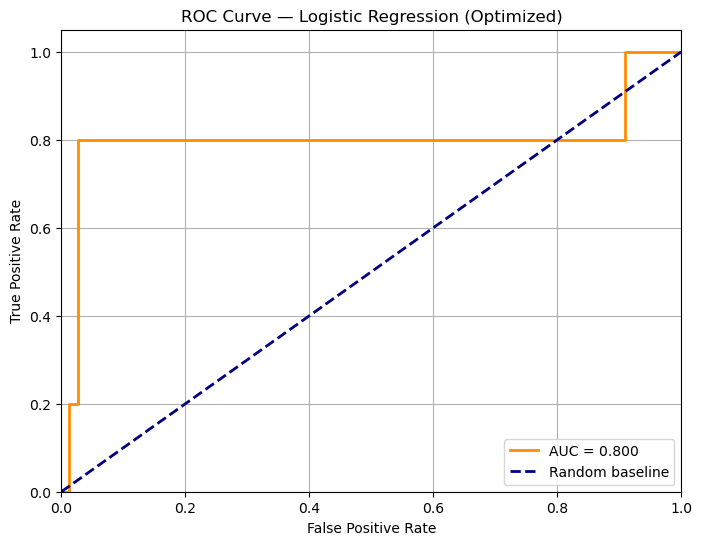

In [29]:
plot_roc_curve(
    grid_search_lr.best_estimator_,
    X_val_kbest,
    y_val,
    model_name="Logistic Regression (Optimized)"
)

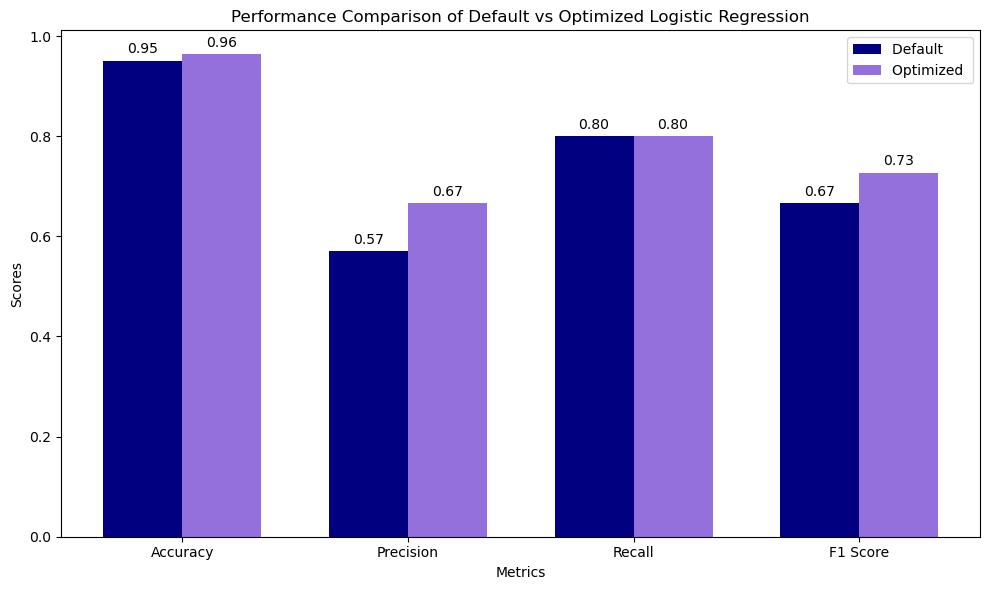

In [30]:
plot_model_comparison(
    y_true=y_val,
    y_pred_default=y_val_pred_lr,
    y_pred_optimized=y_val_pred_lr_optimized,
    model_name="Logistic Regression"
)

### **Decision Tree Classifier (DTC)**

An instance of DTC with default parameters

In [31]:
# Intialize the Decision Tree Classifier
dtc_default = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dtc_default.fit(X_train_kbest, y_train_resampled)

# Make predictions on the validation set
y_val_pred_dtc = dtc_default.predict(X_val_kbest)

# Evaluate the model on the validation set
print("\nDecision Tree Classifier (Default Parameters)")
evaluate_model_on_validation(y_val, y_val_pred_dtc)


Decision Tree Classifier (Default Parameters)

Performance Summary
────────────────────────────────────────────
Accuracy        : 0.926829
Precision       : 0.333333
Recall          : 0.200000
F1 Score        : 0.250000

Confusion Matrix
[[75  2]
 [ 4  1]]

Classification Breakdown
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       0.33      0.20      0.25         5

    accuracy                           0.93        82
   macro avg       0.64      0.59      0.61        82
weighted avg       0.91      0.93      0.92        82



Hyperparameter Tuning using **GridSearchCV** for DTC

In [32]:
# Define parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dtc = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the model on the training data
grid_search_dtc.fit(X_train_kbest, y_train_resampled)

# Output the best parameters
print("Best parameters for Decision Tree Classifier:", grid_search_dtc.best_params_)

# Predict on validation set using the best model
y_val_pred_dtc_optimized = grid_search_dtc.best_estimator_.predict(X_val_kbest)
evaluate_model_on_validation(y_val, y_val_pred_dtc_optimized)

Fitting 50 folds for each of 90 candidates, totalling 4500 fits
Best parameters for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Performance Summary
────────────────────────────────────────────
Accuracy        : 0.939024
Precision       : 0.500000
Recall          : 0.400000
F1 Score        : 0.444444

Confusion Matrix
[[75  2]
 [ 3  2]]

Classification Breakdown
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.50      0.40      0.44         5

    accuracy                           0.94        82
   macro avg       0.73      0.69      0.71        82
weighted avg       0.93      0.94      0.94        82



In [33]:
# Summary of top 10 hyperparameter combinations
top_dtc_configs = pd.DataFrame(grid_search_dtc.cv_results_)
top_dtc_configs[['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by=['rank_test_score', 'mean_test_score'],
    ascending=[True, False]
).head(10)

,params,mean_test_score,rank_test_score
63,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.962063,1
64,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.961560,2
72,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.961559,3
81,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.961559,3
73,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.960689,5
82,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.960689,5
10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.960663,7
9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.960218,8
19,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.960213,9
55,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.960174,10


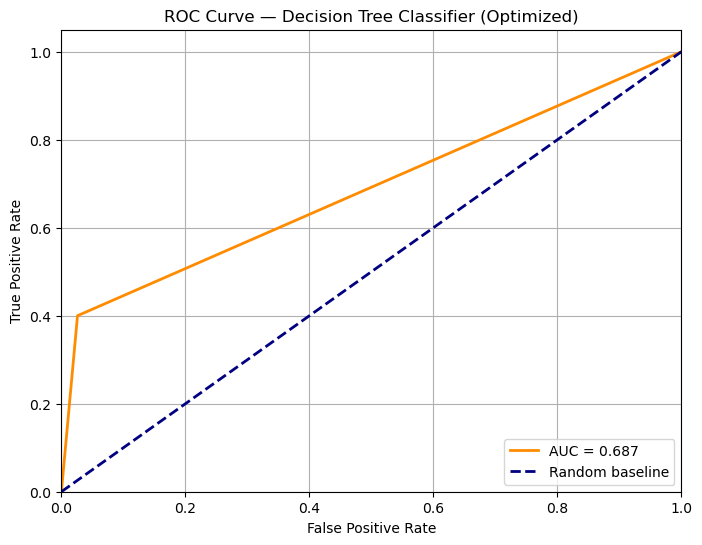

In [34]:
# Plot ROC curve for Decision Tree Classifier
plot_roc_curve(
    grid_search_dtc.best_estimator_,
    X_val_kbest,
    y_val,
    model_name="Decision Tree Classifier (Optimized)"
)

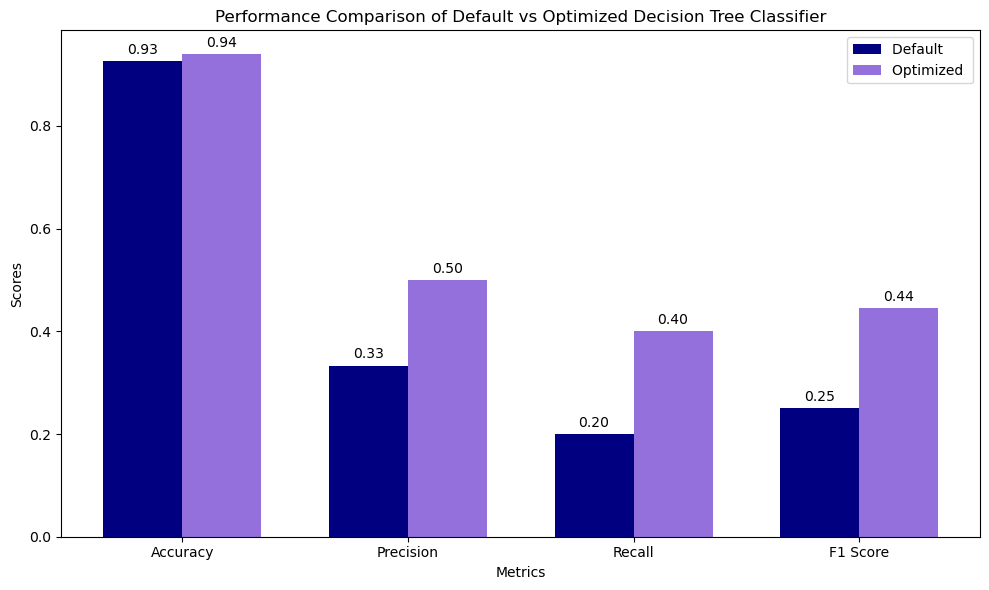

In [35]:
# Plot comparison of default and optimized models
plot_model_comparison(
    y_true=y_val,
    y_pred_default=y_val_pred_dtc,
    y_pred_optimized=y_val_pred_dtc_optimized,
    model_name="Decision Tree Classifier"
)

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

In [36]:
def evaluate_model(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1 Score': report['macro avg']['f1-score'],
        'Weighted Precision': report['weighted avg']['precision'],
        'Weighted Recall': report['weighted avg']['recall'],
        'Weighted F1 Score': report['weighted avg']['f1-score'],
    }
    return metrics

def compare_models(y_true, model_preds, model_names):
    metrics_list = []
    for pred, name in zip(model_preds, model_names):
        metrics_list.append(evaluate_model(y_true, pred, name))

    comparison_df = pd.DataFrame(metrics_list)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, len(model_preds), figsize=(6 * len(model_preds), 4))
    if len(model_preds) == 1:
        axes = [axes]

    for i, (pred, name) in enumerate(zip(model_preds, model_names)):
        cm = confusion_matrix(y_true, pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    # Plot Weighted Metrics
    metrics_to_plot = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score']
    _plot_bar_chart(comparison_df, metrics_to_plot, "Model Comparison (Weighted Average)")

    # Plot Macro Metrics
    metrics_to_plot = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1 Score']
    _plot_bar_chart(comparison_df, metrics_to_plot, "Model Comparison (Macro Average)")

    # Print detailed classification reports
    for pred, name in zip(model_preds, model_names):
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_true, pred, zero_division=0))

    return comparison_df

def _plot_bar_chart(df, metrics, title):
    plt.figure(figsize=(15, 8))
    x = np.arange(len(metrics))
    width = 0.25

    for i, row in df.iterrows():
        plt.bar(x + i * width - width, [row[m] for m in metrics], width, label=row['Model'])

    for i, row in df.iterrows():
        for j, m in enumerate(metrics):
            plt.annotate(f"{row[m]:.4f}",
                         xy=(x[j] + i * width - width, row[m]),
                         xytext=(0, 3),
                         textcoords="offset points",
                         ha='center', va='bottom')

    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks(x, metrics)
    plt.legend()
    plt.tight_layout()
    plt.show()


Logistic Regression (LR)

In [37]:
y_pred_lr_test = grid_search_lr.best_estimator_.predict(X_test_kbest)

Decision Tree Classifier (DTC)

In [38]:
y_pred_dt_test = grid_search_dtc.best_estimator_.predict(X_test_kbest)

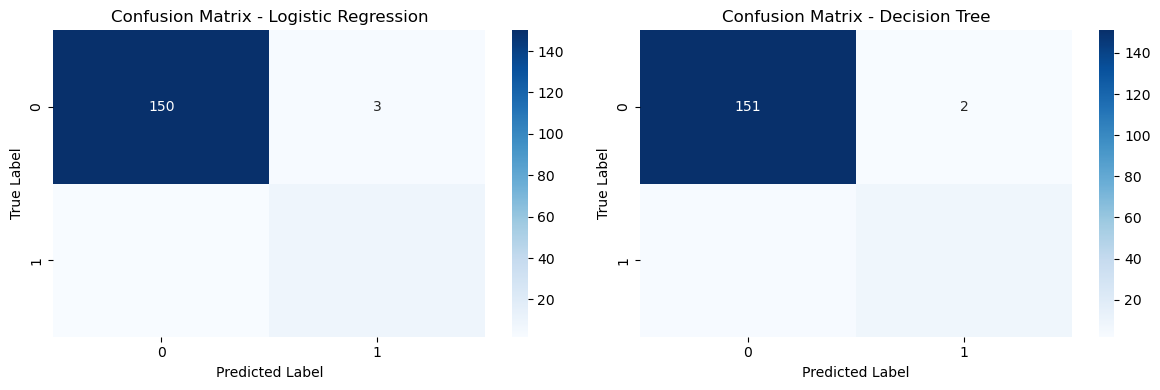

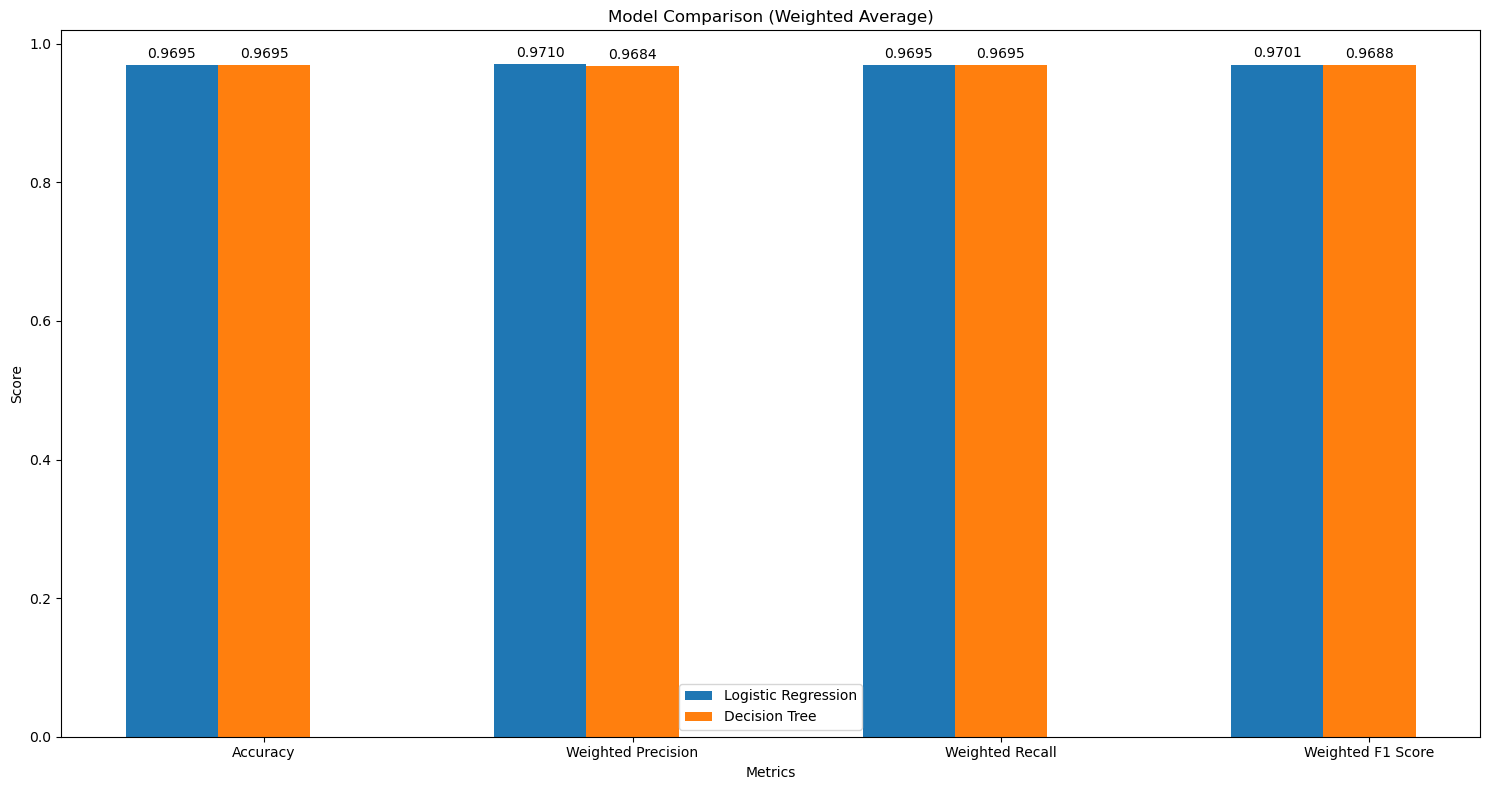

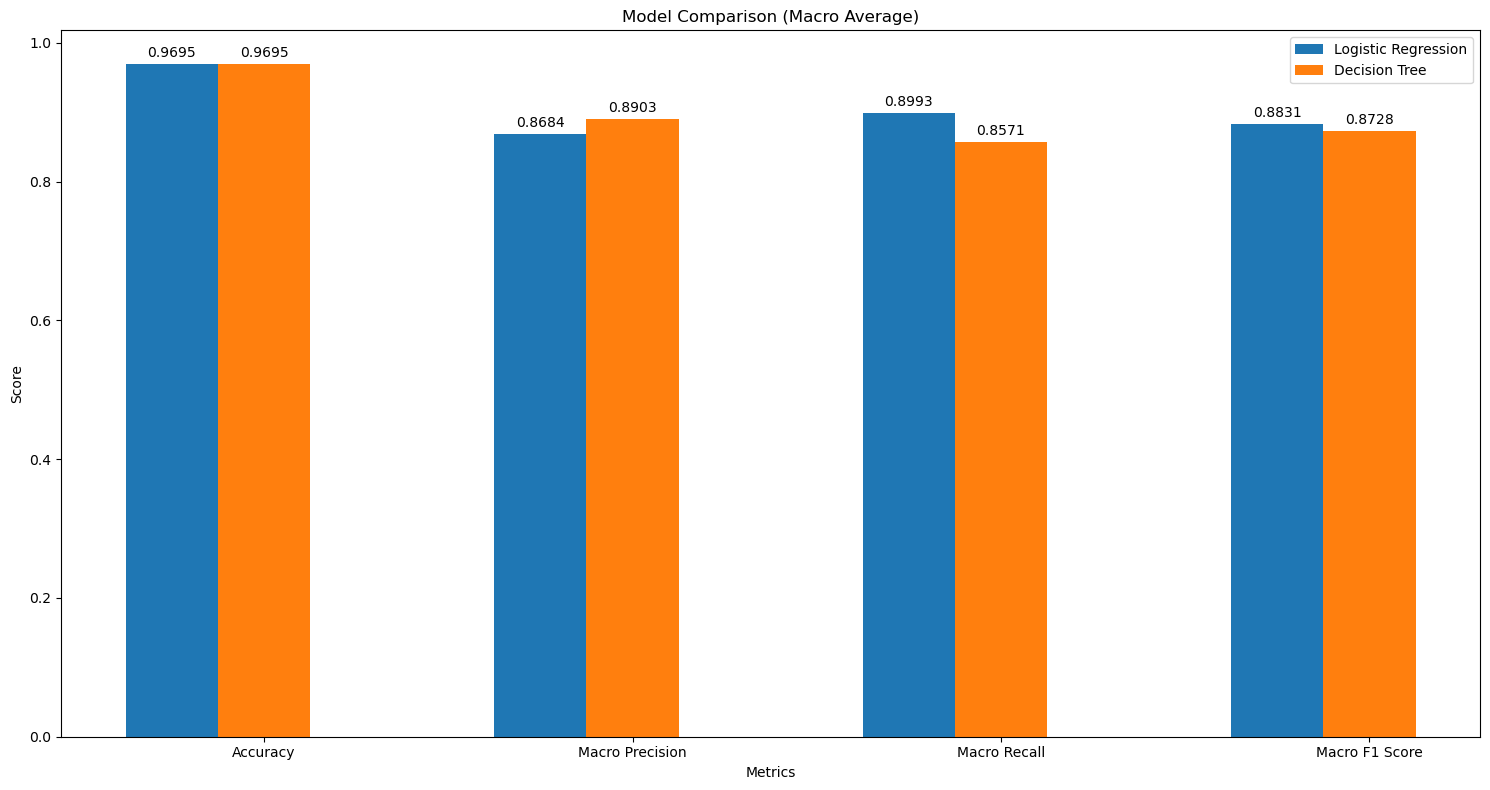


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.75      0.82      0.78        11

    accuracy                           0.97       164
   macro avg       0.87      0.90      0.88       164
weighted avg       0.97      0.97      0.97       164


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       153
           1       0.80      0.73      0.76        11

    accuracy                           0.97       164
   macro avg       0.89      0.86      0.87       164
weighted avg       0.97      0.97      0.97       164



,Model,Accuracy,Macro Precision,Macro Recall,Macro F1 Score,Weighted Precision,Weighted Recall,Weighted F1 Score
0,Logistic Regression,0.969512,0.868421,0.899287,0.883108,0.970956,0.969512,0.970125
1,Decision Tree,0.969512,0.890260,0.857100,0.872809,0.968411,0.969512,0.968836


In [39]:
compare_models(
    y_true=y_test,
    model_preds=[y_pred_lr_test, y_pred_dt_test],
    model_names=["Logistic Regression", "Decision Tree"]
)